# BANK CUSTOMER CHURN PREDICTION


<img align="left" width="500" height="400" src="https://drive.google.com/uc?export=view&id=1cndfDAb6JDdtMtxxSl6bIyZfDztJeTkS">

## Introduction.

### Customer churn refers to the phenomenon when a customer leaves a company or an organization,in our case a bank. Some studies shows that accquiring new coustomers can cost 5 times than that of satisfying and retaining existing customers. Thus tracking of bank customer churn rate through prediction will help in reducing marketing costs, lead to increase in capital ,expanding total customers and a lot more.

### In this project, we will be doing an Exploratory Data Analysis(EDA) and churn prediction through machine learning and deep learning techniques on the bank customers dataset which is taken from Kaggle.

## Overview of Notebook

### 1. Load and Manipulate Data
### 2. Exploratory Data Analysis¶
### 3. Feature Engineering for the baseline model
### 4. Data Preparation for the Model fitting
### 5. Model fitting and selection
### 6.Handling the problem of Imbalanced dataset
### 7. Conclusion.

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
# tf.test.gpu_device_name()

## 1. Load and Manipulate Data

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#  Checking missing values in dataset
df.isnull().sum().sum()

0

In [5]:
# Checking unique values in a column to categorize into continuous and categorical columns.
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
# Dropping columns which are not necessary for prediction
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [7]:
df.shape

(10000, 11)

In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## 2. Exploratory Data Analysis¶

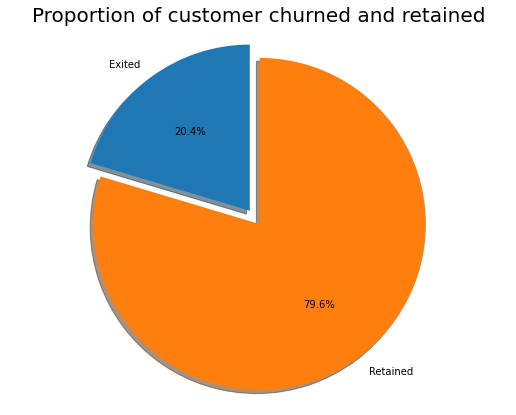

In [9]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

### From above pie chart,we can see that around 20% of customers had churned i.e exited and 80% retained.This shows that our dataset is a little imbalanced so we have to predict customer churn with a good accuracy as this 20% customers are of more interest to the bank. 

### Now visualizing countplots for categorical columns.

Text(0.5, 1.0, 'Countplot-Geography Column')

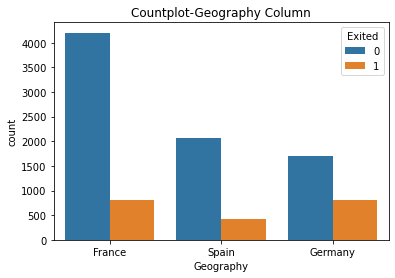

In [10]:
sns.countplot(x='Geography', hue = 'Exited',data = df).set_title('Countplot-Geography Column')


Text(0.5, 1.0, 'Countplot-Gender Column')

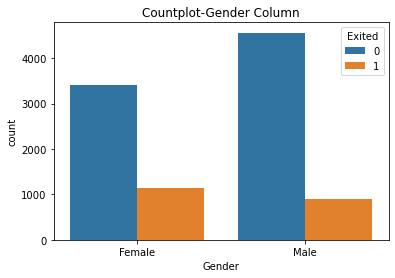

In [11]:
sns.countplot(x='Gender', hue = 'Exited',data = df).set_title('Countplot-Gender Column')

Text(0.5, 1.0, 'Countplot-HasCreditCard Column')

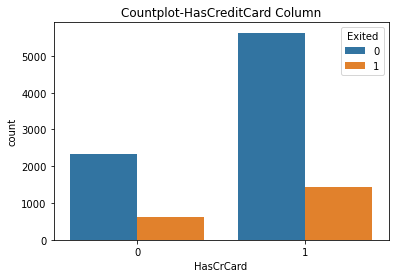

In [12]:
sns.countplot(x='HasCrCard', hue = 'Exited',data = df).set_title('Countplot-HasCreditCard Column')

Text(0.5, 1.0, 'Countplot-IsActiveMember Column')

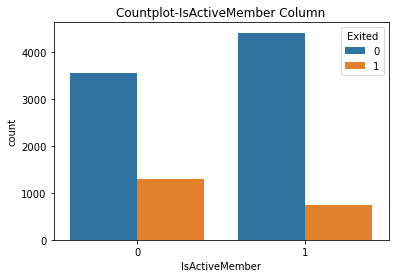

In [13]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df).set_title('Countplot-IsActiveMember Column')

### From the above countplots we can infer that-

#### 1.Total umber of customers who retained is highest from France and those who exited are highest from Germany,which means the bank needs to focus more on customers from Germany followed by France so that they don't churn.
#### 2. The proportion of female customers churning is greater than that of male customers.
#### 3. Suprisingly,coustomers who had credit card churned more which can be a coincidence.
#### 4. As usual,the inactive members churned more. 

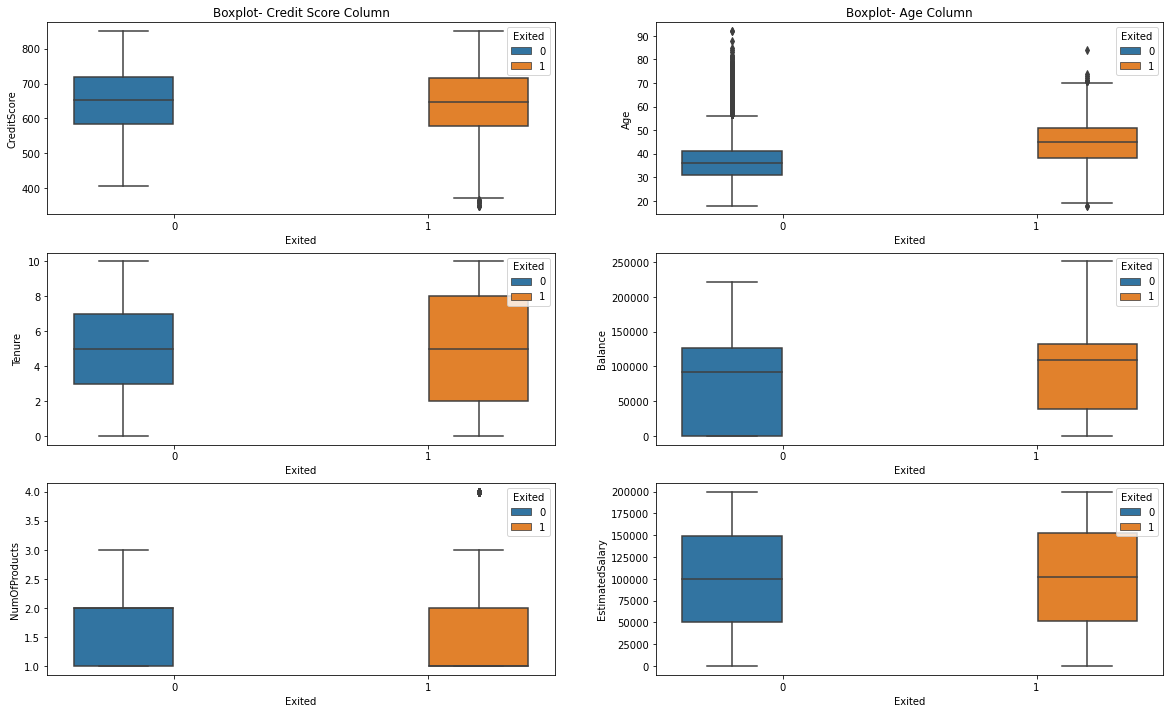

In [14]:
 # Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0]).set_title('Boxplot- Credit Score Column')
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1]).set_title('Boxplot- Age Column')
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

### From the above boxplots we can infer that-

#### -- There is no significant difference in Credit score,estimated salary and number of products they possess  between customers who churned and who don't.
#### -- The older customers are churning more than the young ones which indicates that the bank need to focus on older customers more.
#### -- Customers with tenure period with bank either too less or too more tends to churn more.
#### -- Customers who churned generally have more bank balance which is a bad indications as it will lead to capital deficiency in the bank.

## 3. Feature Engineering

### We would like to add features that are likely to have an impact on the probability of churning.

(-1.0, 5.0)

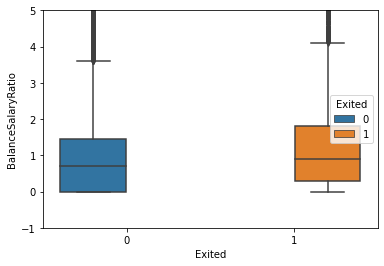

In [15]:
# 1st Attribute - Balance Salary Ratio
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

### Clearly we can see that customers with high BalanceSalaryRatio is churning more,which balance or salary feature didn't showed up.

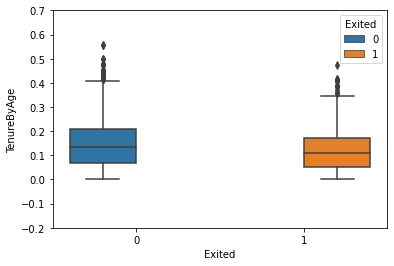

In [16]:
#  2nd Attribute-Tenure By Age
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-0.2, 0.7)
plt.show()

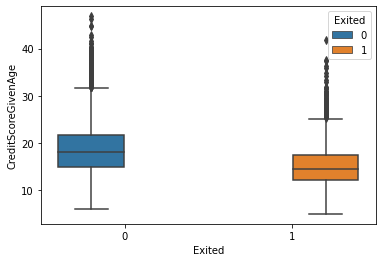

In [17]:
# 3rd Attribute- Credit Score Given Age
df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)
sns.boxplot(y='CreditScoreGivenAge',x = 'Exited', hue = 'Exited',data = df)
plt.show()

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


In [19]:
df.shape

(10000, 14)

## 4. Data Preparation for the Model fitting

In [20]:
# Arranging columns by data type for easier manipulation

continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
categorical_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df = df[['Exited'] + continuous_vars + categorical_vars]
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,0,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,0,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,0,0,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


#### Correlation Matrix for continuous attributes

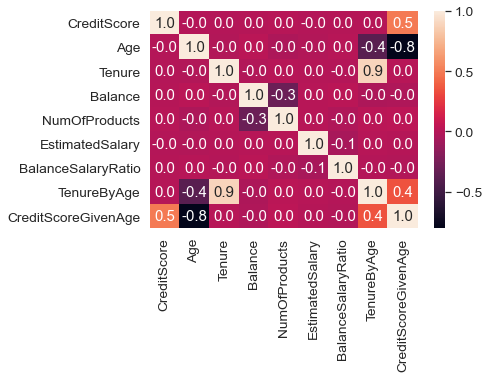

In [21]:
sns.set()
sns.set(font_scale = 1.25)
sns.heatmap(df[continuous_vars].corr(), annot = True,fmt = ".1f")
plt.show()

### We can see from the correlation matrix that only the columns which we have created have some significant correlation with columns they are made from.

In [22]:
# Changing values of column HasCrCard and IsActiveMember from 0 to -1 so that they will influence negatively to the model instead of no effect.
df.loc[df.HasCrCard == 0, 'HasCrCard'] = -1
df.loc[df.IsActiveMember == 0, 'IsActiveMember'] = -1
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


### One-hot encoding categorical columns

In [23]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [24]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df['Gender']= le.fit_transform(df['Gender']) 
df['Geography']= le.fit_transform(df['Geography']) 

# Gender 0-Female,1-Male
# Geography 0-France,1-Germany,2-Spain

In [26]:
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,0,0
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,2,0
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,0,0
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,0,0
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,2,0


In [27]:
df1 = pd.get_dummies(data=df, columns=['Gender','Geography'])
df1.columns

Index(['Exited', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge',
       'CreditScoreGivenAge', 'HasCrCard', 'IsActiveMember', 'Gender_0',
       'Gender_1', 'Geography_0', 'Geography_1', 'Geography_2'],
      dtype='object')

In [28]:
df1.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,1,0,1,0,0
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,1,0,0,0,1
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,1,0,1,0,0
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,1,0,1,0,0
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,1,0,0,0,1


In [29]:
continuous_vars

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'BalanceSalaryRatio',
 'TenureByAge',
 'CreditScoreGivenAge']

### Scaling the continuous attributes using MinMaxScaler

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[continuous_vars] = scaler.fit_transform(df1[continuous_vars])

In [31]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

Exited: [1 0]
CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0

## 5. Model fitting and selection


### For Model fitting, we will try a couple of different machine learning algorithms in order to get an idea about which machine learning algorithm performs better.Since this is a classification problem,we will try the following algorithms :
### 1. Logistic Regression
### 2. Logistic Regression with degree 2 polynomial kernel
### 3.SVM with Rbf kernel and poly kernel
### 4. Random Forest Classifier
### 5. Extreme Gradient Boosting Classifier


## We will also use deep learning  after these techniques.

In [2]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [33]:
df1.head()
df1.shape

(10000, 17)

In [103]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [104]:
X_train.shape

(8000, 16)

### Figuring out the importance of features in our dataset

In [37]:
# We perform training on the Random Forest model and generate the importance of the features

features_label = X_train.columns
forest = RandomForestClassifier (n_estimators = 1000, random_state = 0, n_jobs = -1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) CreditScore                    0.162059
 2) Age                            0.125722
 3) Tenure                         0.125141
 4) Balance                        0.092627
 5) NumOfProducts                  0.090254
 6) EstimatedSalary                0.090037
 7) BalanceSalaryRatio             0.078720
 8) TenureByAge                    0.073692
 9) CreditScoreGivenAge            0.044547
10) HasCrCard                      0.041200
11) IsActiveMember                 0.021166
12) Gender_0                       0.013834
13) Gender_1                       0.010538
14) Geography_0                    0.010499
15) Geography_1                    0.010498
16) Geography_2                    0.009465


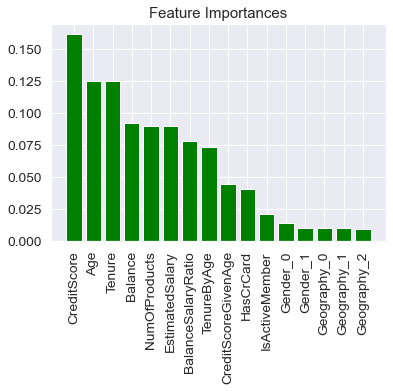

In [38]:
# Visualization of the Feature importances
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color = "green", align = "center")
plt.xticks(range(X_train.shape[1]), features_label, rotation = 90)
plt.show()

In [34]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)


### Fitting different models to GridSearchCV to find out the best parameters.

In [40]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(X_train,y_train)
best_model(log_primal_Grid)

0.8168750000000001
{'C': 10, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)


In [41]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(X_train)
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,y_train)
best_model(log_pol2_Grid)

0.8594999999999999
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [42]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(X_train,y_train)
best_model(SVM_grid)

0.8538753079720999
{'C': 150, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=150, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [43]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(X_train,y_train)
best_model(SVM_grid)

0.8552506518080589
{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [44]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(X_train,y_train)
best_model(RanFor_grid)

0.8665
{'max_depth': 8, 'max_features': 7, 'min_samples_split': 3, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [45]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train,y_train)
best_model(xgb_grid)

0.86625
{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


### Fitting our training dataset with the model with best parameters for each of the machine learning techniques.

In [105]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='auto',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=250, tol=1e-05)

In [106]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(X_train)
log_pol2 = LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,y_train)

LogisticRegression(C=50, max_iter=300, solver='liblinear')

In [107]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=150, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(X_train,y_train)

SVC(C=150, gamma=0.1, probability=True)

In [70]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(X_train,y_train)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [108]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=7, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=3)

In [109]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=5,
                    min_child_weight=1, missing=None, n_estimators=100,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None,  subsample=1)
XGB.fit(X_train,y_train)

C:\Users\tanis\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:06:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

### Reviewing best model fit accuracy. Our keen interest is on the performance in predicting 1's (Customers who churn)

In [110]:
# Normal logistic regression
print(classification_report(y_train, log_primal.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6368
           1       0.64      0.23      0.34      1632

    accuracy                           0.82      8000
   macro avg       0.74      0.60      0.62      8000
weighted avg       0.79      0.82      0.78      8000



In [111]:
# Logistic Regression with degree 2 polynomial kernel
print(classification_report(y_train,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6368
           1       0.76      0.49      0.59      1632

    accuracy                           0.86      8000
   macro avg       0.82      0.72      0.76      8000
weighted avg       0.85      0.86      0.85      8000



In [112]:
# SVM with RBF kernel
print(classification_report(y_train,  SVM_RBF.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6368
           1       0.83      0.41      0.55      1632

    accuracy                           0.86      8000
   macro avg       0.85      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



In [113]:
# SVM with polynomial kernel
print(classification_report(y_train,  SVM_POL.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      6368
           1       0.51      0.73      0.61      1632

    accuracy                           0.80      8000
   macro avg       0.72      0.78      0.74      8000
weighted avg       0.84      0.80      0.82      8000



In [114]:
# Random Forest Classifier
print(classification_report(y_train,  RF.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6368
           1       0.88      0.52      0.65      1632

    accuracy                           0.89      8000
   macro avg       0.89      0.75      0.79      8000
weighted avg       0.89      0.89      0.88      8000



In [115]:
# Xtreme Gradient Boosting
print(classification_report(y_train,  XGB.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6368
           1       0.85      0.54      0.66      1632

    accuracy                           0.89      8000
   macro avg       0.87      0.76      0.80      8000
weighted avg       0.88      0.89      0.88      8000



### Clearly XG Boost is giving the best training data acuracy of 89% for our dataset.

In [61]:
y = y_train
X = X_train
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])


### Plotting the auc_score curve for all the models which is also showing Random Forest as best.

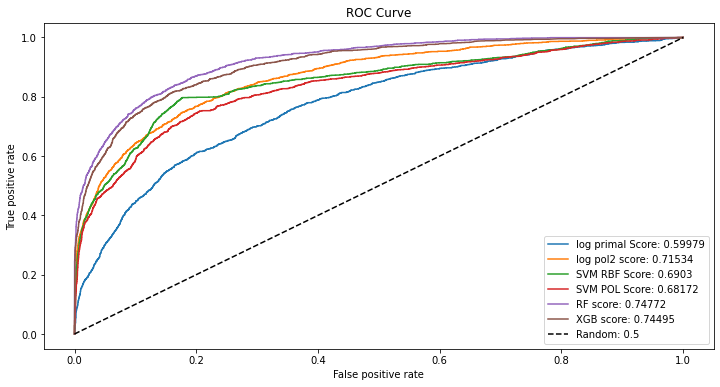

In [62]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

### Checking accuracy for test data with XG Boost Model

In [116]:
print(classification_report(y_test,  XGB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.46      0.57       405

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



### Final accuracy for the test data is coming to be 86 % which is quite good but as we have seen that our dataset is a little imbalanced thatswhy our accuracy for customers who had exited is coming low.


## Using Artitficial Neural Network technique

In [59]:
X_train.shape

(8000, 16)

### Fitting model with 2 hidden layers along with appling dropout regularization.Final accuracy for training data is coming to be 85.28 %

In [62]:
# creating the model
model = Sequential()

from keras.layers import Dropout

# first hidden layer
model.add(Dense(8,activation = 'relu', input_dim = 16))
model.add(Dropout(0.1))

# second hidden layer
model.add(Dense( 8, activation = 'relu'))
model.add(Dropout(0.1))

# output layer
model.add(Dense( 1,activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(X_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
800/800 [==============================] - 1s 1ms/step - loss: 0.5240 - accuracy: 0.7916
Epoch 2/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4821 - accuracy: 0.7959
Epoch 3/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4663 - accuracy: 0.7960
Epoch 4/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4535 - accuracy: 0.7961
Epoch 5/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4456 - accuracy: 0.8080
Epoch 6/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4385 - accuracy: 0.8115
Epoch 7/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4339 - accuracy: 0.8173
Epoch 8/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4234 - accuracy: 0.8195
Epoch 9/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4182 - accuracy: 0.8261
Epoch 10/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4079 - accuracy: 0.8307

### Fitting model with 2 hidden layers along without appling dropout regularization.Final accuracy for training data is coming to be 86.21 %,better than the previous one.

In [66]:
# creating the model
model = Sequential()

from keras.layers import Dropout

# first hidden layer
model.add(Dense(8,activation = 'relu', input_dim = 16))

# second hidden layer
model.add(Dense( 8, activation = 'relu'))

# output layer
model.add(Dense( 1,activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(X_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4955 - accuracy: 0.7954
Epoch 2/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4581 - accuracy: 0.7965
Epoch 3/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4443 - accuracy: 0.8039
Epoch 4/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4328 - accuracy: 0.8154
Epoch 5/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4243 - accuracy: 0.8234
Epoch 6/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4207 - accuracy: 0.8261
Epoch 7/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4168 - accuracy: 0.8303
Epoch 8/50
800/800 [==============================] - 2s 2ms/step - loss: 0.4139 - accuracy: 0.8311
Epoch 9/50
800/800 [==============================] - 2s 2ms/step - loss: 0.4107 - accuracy: 0.8347
Epoch 10/50
800/800 [==============================] - 2s 2ms/step - loss: 0.4082 - accuracy: 0.8353

In [79]:
y_test.shape

(2000,)

### Evaluating test data with this model and accuracy is coming to be 85.32 % which is almost similar to our Random Forest Model.

In [67]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3589 - accuracy: 0.8535


[0.3589024841785431, 0.8535000085830688]

In [73]:
# Manually verifying some predictions
yp = model.predict(X_test)
yp[:10]

array([[0.03836393],
       [0.07862398],
       [0.08457944],
       [0.08565021],
       [0.06044045],
       [0.1115807 ],
       [0.02741206],
       [0.2738074 ],
       [0.01431099],
       [0.96245205]], dtype=float32)

In [72]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [74]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

### Classification Report for this model is almost same as that of Random Forest Model.

In [75]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1595
           1       0.75      0.41      0.53       405

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



### Confusion Matrix

Text(64.5, 0.5, 'Truth')

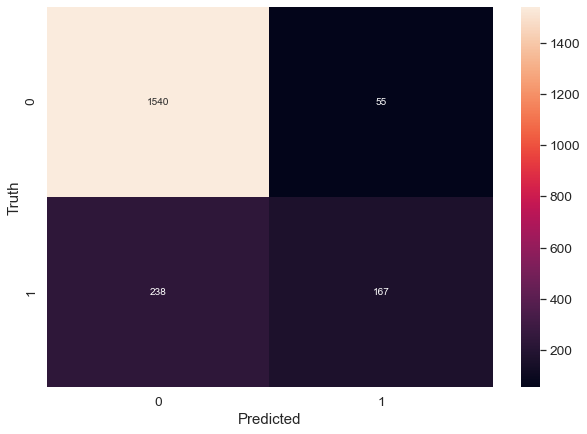

In [78]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## 6.Handling the problem of Imbalanced dataset

### Removing the imbalance of our dataset by SMOTE oversampling technique  

In [118]:
X.shape

(10000, 16)

In [119]:
y.shape

(10000,)

In [120]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [121]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

### Now we have equal number of churned and retaining customers.

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [123]:
y_train.value_counts()

1    6370
0    6370
Name: Exited, dtype: int64

### Fitting with the XGB model generated using GridSearchCV.

In [137]:
XGB2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.2, max_delta_step=0,max_depth=7,
                    min_child_weight=1, missing=None, n_estimators=100,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None,  subsample=1)
XGB2.fit(X_train,y_train)

[21:22:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

### Training set accuracy is coming to be 97 % which is great in itself.

In [138]:
a=XGB2
print(classification_report(y_train,  a.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6370
           1       0.98      0.95      0.97      6370

    accuracy                           0.97     12740
   macro avg       0.97      0.97      0.97     12740
weighted avg       0.97      0.97      0.97     12740



### Testing set accuracy is coming to be 91 % which has increased from 86% which we got in from our previous XGB model .

In [139]:
print(classification_report(y_test,  a.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.93      0.88      0.90      1593

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186



In [3]:
XGB2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.2, max_delta_step=0,max_depth=7,
                    min_child_weight=1, missing=None, n_estimators=100,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None,  subsample=1)

In [7]:
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(XGB2, 'churnXGB.pkl') 
  
# Load the model from the file 
# XGB_from_joblib = joblib.load('churnXGB.pkl')  
  
# Use the loaded model to make predictions 
# XGB_from_joblib.predict(X_test) 

['churnXGB.pkl']

## 7.Conclusion

### We can see that by balancing the dataset has increased our overall testing data accuracy to 91% , also it has invidually increased the accuracy for the customers who had churned (57% previously to 90% now) from the bank which matters to us more than the customers who retained.